<h1> Data Evaluation </h1>

<hr>


In [ ]:
# Conection to google drive
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive/My Drive/[2024-2025] AN2DL/

Mounted at /gdrive
/gdrive/My Drive/[2024-2025] AN2DL


In [ ]:
import numpy as np

import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

import matplotlib.gridspec as gridspec

<hr>
<h2> Original Dataset </h2>
<hr>

In [ ]:
# Load the training data here
data = np.load('training_set.npz')
X = data['images']
y = data['labels']

In [ ]:
class_name = {
    0: "Basophil",
    1: "Eosinophil",
    2: "Erythroblast",
    3: "Immature granulocytes",
    4: "Lymphocyte",
    5: "Monocyte",
    6: "Neutrophil",
    7: "Platelet",
}

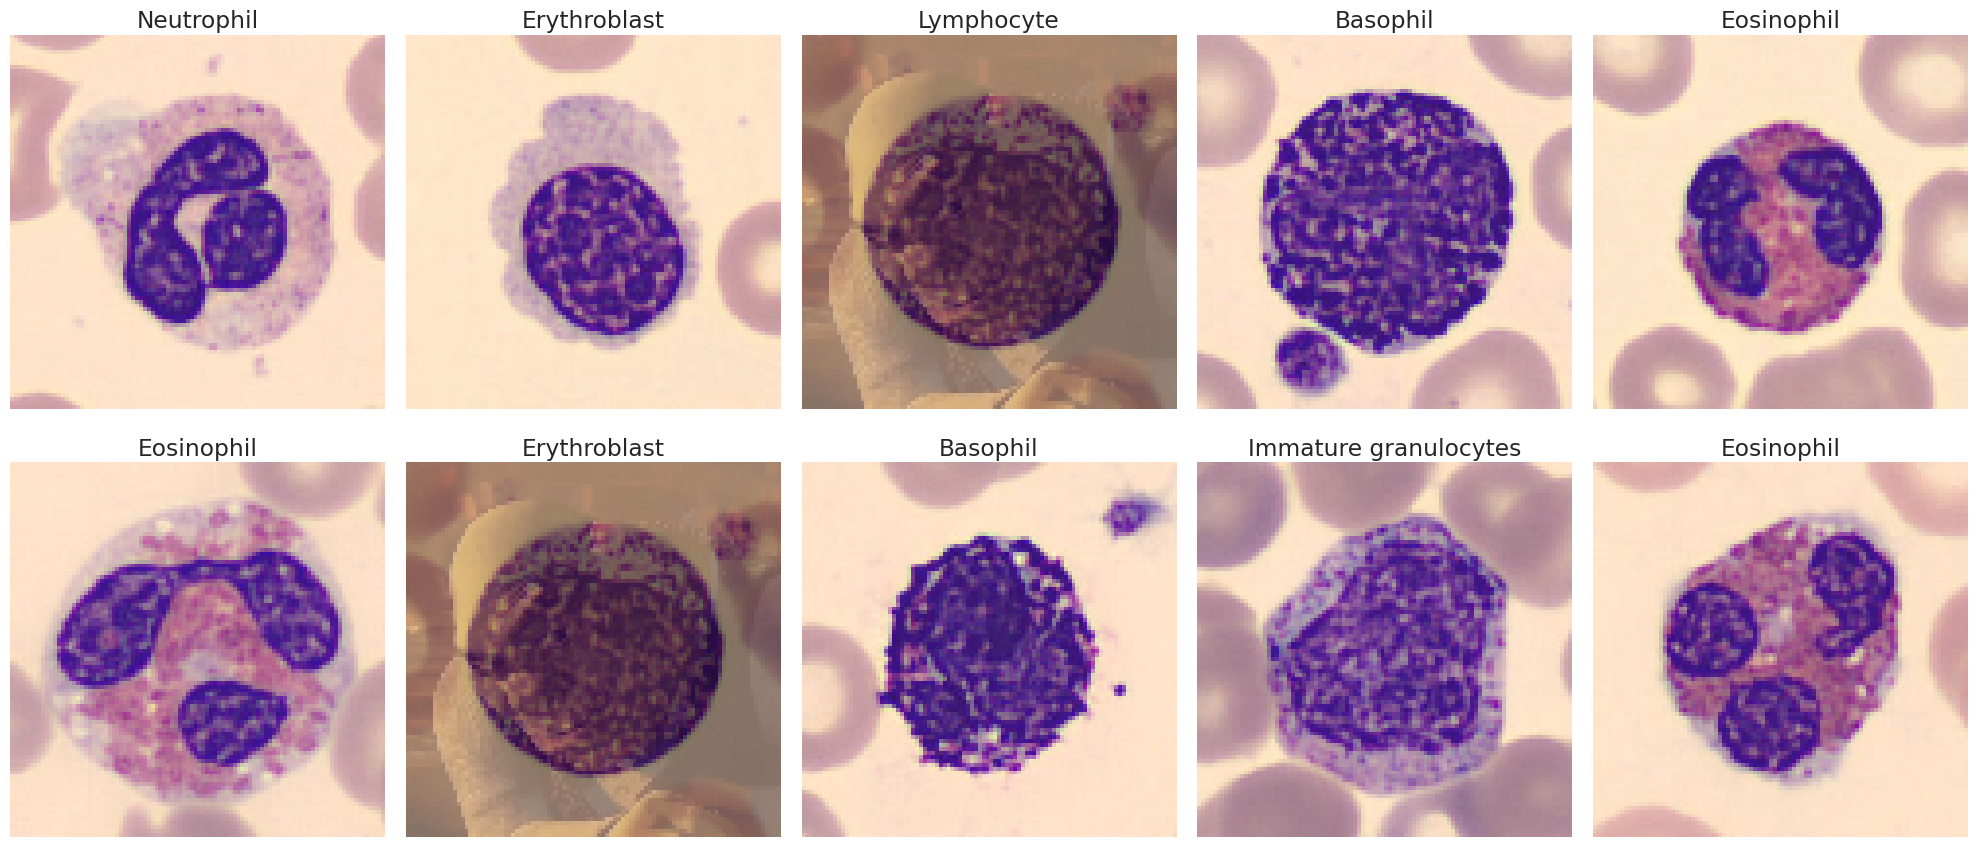

In [ ]:
# Number of images to display
num_img = 10

# Select random indices from the training set
random_indices = random.sample(range(len(X)), num_img)

# Create subplot layout for images
fig, axes = plt.subplots(2, num_img // 2, figsize=(20, 9))

for i, idx in enumerate(random_indices):
    ax = axes[i // 5, i % 5]

    # Display the image at the selected index
    ax.imshow(X[idx])

    # Add class name as title, formatting it to replace underscores with spaces and capitalise
    pic_title = class_name[y[idx][0]]
    ax.set_title(pic_title, pad=5)

    # Remove axis lines for clearer display
    ax.axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
print(f'Original trainning dataset size: {len(X)} images and {len(y)} labels')

Original trainning dataset size: 13759 images and 13759 labels


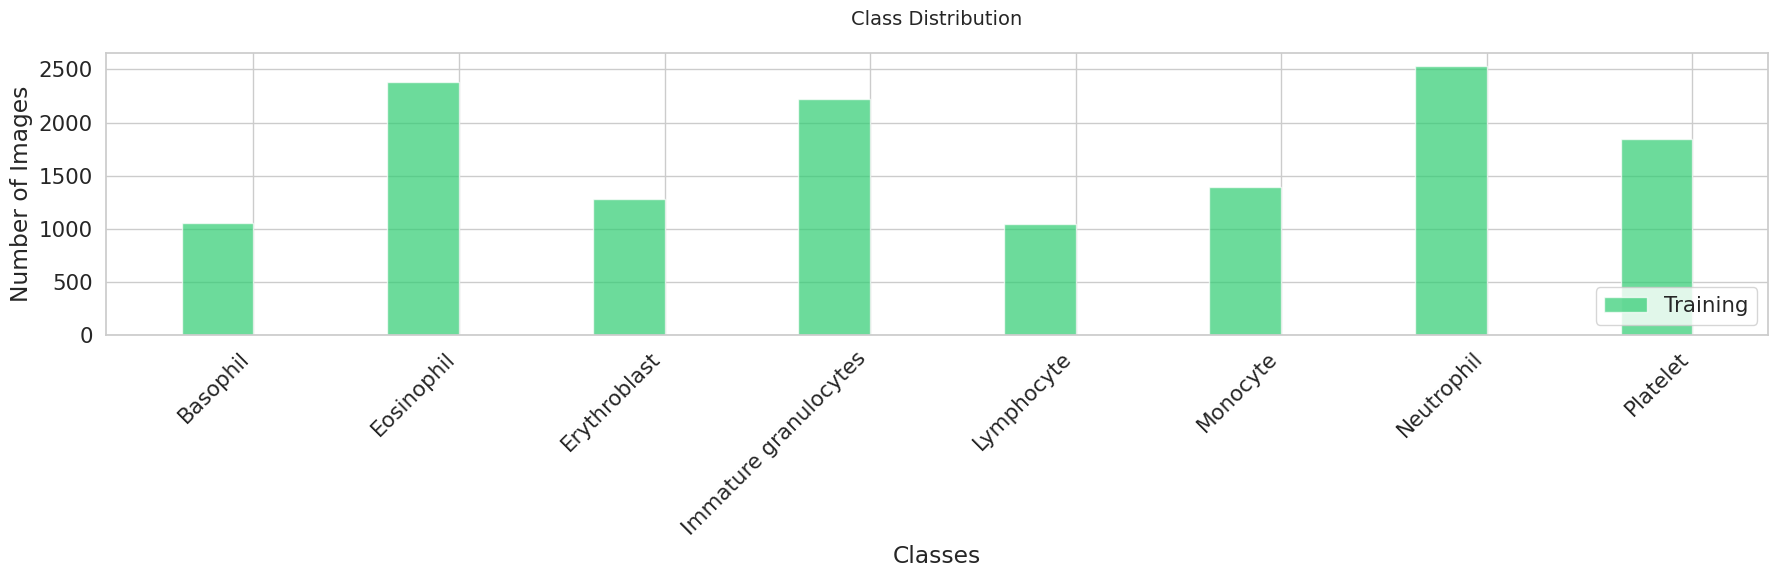

In [ ]:
# Set seaborn style for the plot
sns.set_style("whitegrid")
plt.figure(figsize=(18, 6))

# Calculate class distributions for dataset
dataset_dist = np.bincount(y[:,0])

# Create x positions and set bar width
x = np.arange(len(class_name))
width = 0.35

# Plot bars for training and test distributions
plt.bar(x - width / 2, dataset_dist, width, label='Training', color='#2ecc71', alpha=0.7)

# Customise plot title and labels
plt.title('Class Distribution', pad=20, fontsize=14)
plt.xlabel('Classes')
plt.ylabel('Number of Images')

# Set class names as x-axis labels with rotation
plt.xticks(x, list(class_name.values()), rotation=45, ha='right')

# Add legend for training and test distributions
plt.legend(loc='lower right')

# Adjust layout for optimal spacing
plt.tight_layout()
plt.show()

<hr>
<h2> Data Balancing by up Sampling </h2>
<hr>

<p> In this section the classes with lower amount of data were selected in a trail to balance the dataset by creating new images with some shifting, rotation and flips </p>

In [ ]:
# 0 - samples corresponding to Basophil
BasophilAugmentation = [i for i in range(0, len(y)) if y[i, 0] == 0]

# 2 - samples corresponding to Erythroblast
ErythroblastAugmentation = [i for i in range(0, len(y)) if y[i, 0] == 2]

# 4 - samples corresponding to Lymphocyte
LymphocyteAugmentation = [i for i in range(0, len(y)) if y[i, 0] == 4]

# 5 - samples corresponding to Monocyte
MonocyteAugmentation = [i for i in range(0, len(y)) if y[i, 0] == 5]

# 7 - samples corresponding to Platelet
PlateletAugmentation = [i for i in range(0, len(y)) if y[i, 0] == 7]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Data Augmentation for the minority class
datagen = ImageDataGenerator(rotation_range=360, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True, vertical_flip=True)

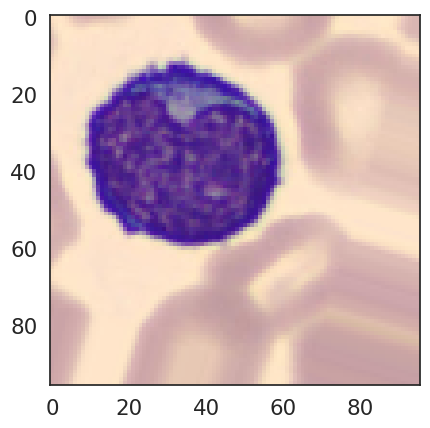

In [ ]:
plt.imshow(np.array([datagen.random_transform(X[LymphocyteAugmentation[0]])])[0])

In [ ]:
# for each of the list containing the indexes of the minority classes we created a new image by
# taking an already existing one and appying some transformations.
for i in range(1300):

  X = np.concatenate([X, np.array([datagen.random_transform(X[BasophilAugmentation[i % len(BasophilAugmentation)]])])], axis=0)
  y = np.concatenate([y, np.array(0).reshape(-1, 1)], axis=0)

  X = np.concatenate([X, np.array([datagen.random_transform(X[LymphocyteAugmentation[i % len(LymphocyteAugmentation)]])])], axis=0)
  y = np.concatenate([y, np.array(4).reshape(-1, 1)], axis=0)

  if i <= 1000:
    X = np.concatenate([X, np.array([datagen.random_transform(X[MonocyteAugmentation[i]])])], axis=0)
    y = np.concatenate([y, np.array(5).reshape(-1, 1)], axis=0)

    X = np.concatenate([X, np.array([datagen.random_transform(X[ErythroblastAugmentation[i]])])], axis=0)
    y = np.concatenate([y, np.array(2).reshape(-1, 1)], axis=0)

    if i <= 500:
      X = np.concatenate([X, np.array([datagen.random_transform(X[PlateletAugmentation[i]])])], axis=0)
      y = np.concatenate([y, np.array(7).reshape(-1, 1)], axis=0)

In [ ]:
file_name = 'increased_balanced_dataset_noBrightness_noContrast_noZoom.npz'
np.savez(file_name, images=X.astype('uint8'), labels=y.astype('uint8'))

In [ ]:
data = np.load('increased_balanced_dataset_noBrightness_noContrast.npz')
X = data['images']
y = data['labels']

In [ ]:
print(f'Size of dataset after up sampling: {len(X)} images and {len(y)} labels')

Size of dataset after up sampling: 18862 images and 18862 labels


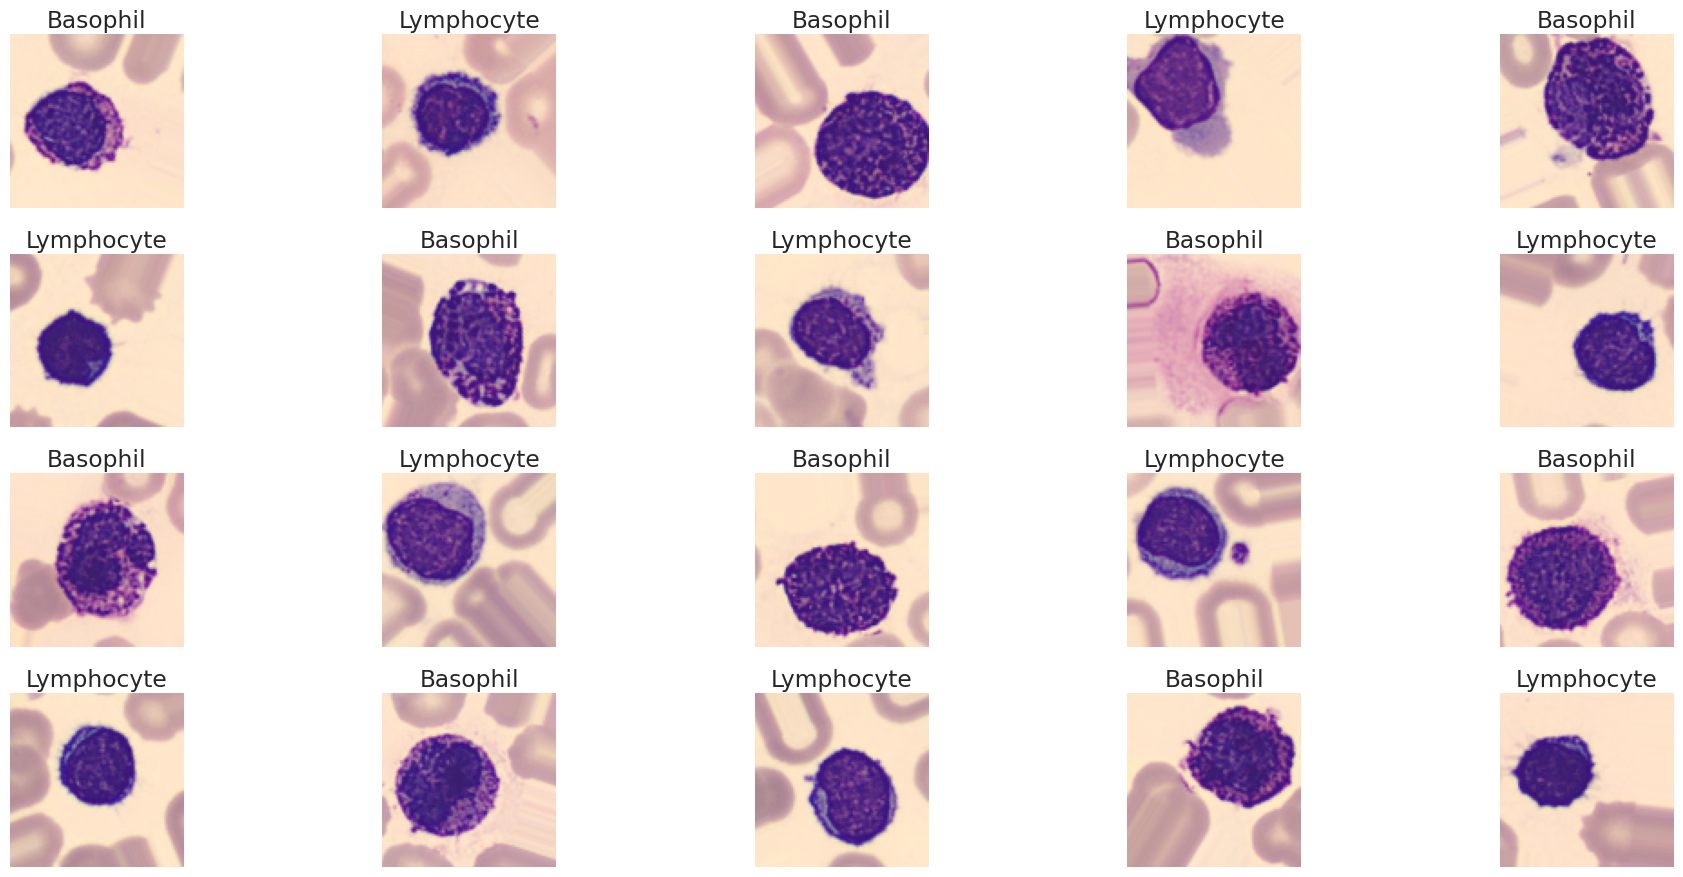

In [ ]:
# Select random indices from the training set
image_generated_indices = range(18842, 18862)

# Create subplot layout for images
fig, axes = plt.subplots(4, (len(image_generated_indices)) // 4, figsize=(20, 9))

for i, idx in enumerate(image_generated_indices):
    ax = axes[i // 5, i % 5]

    # Display the image at the selected index
    ax.imshow(X[idx])

    # Add class name as title, formatting it to replace underscores with spaces and capitalise
    pic_title = class_name[y[idx][0]]
    ax.set_title(pic_title, pad=5)

    # Remove axis lines for clearer display
    ax.axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

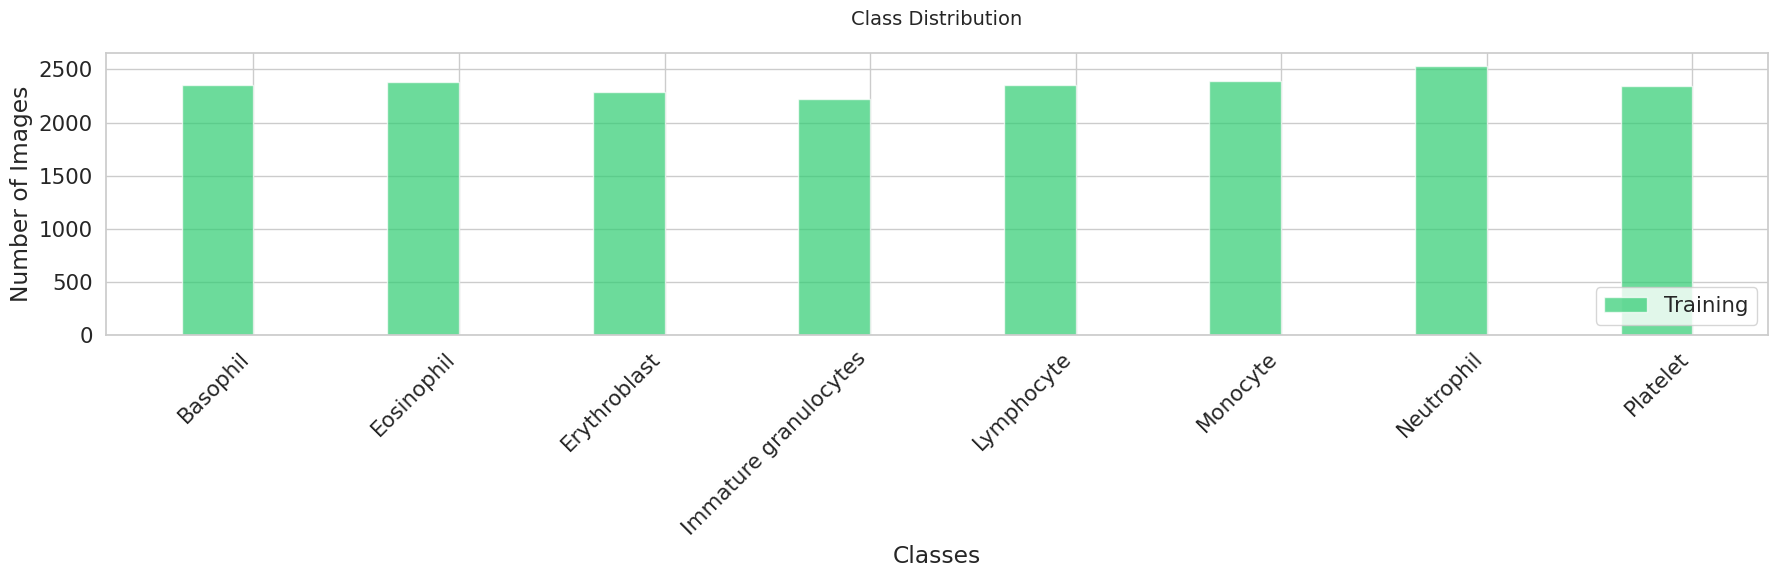

In [ ]:
# Set seaborn style for the plot
sns.set_style("whitegrid")
plt.figure(figsize=(18, 6))

# Calculate class distributions for dataset
dataset_dist = np.bincount(y[:,0])

# Create x positions and set bar width
x = np.arange(len(class_name))
width = 0.35

# Plot bars for training and test distributions
plt.bar(x - width / 2, dataset_dist, width, label='Training', color='#2ecc71', alpha=0.7)

# Customise plot title and labels
plt.title('Class Distribution', pad=20, fontsize=14)
plt.xlabel('Classes')
plt.ylabel('Number of Images')

# Set class names as x-axis labels with rotation
plt.xticks(x, list(class_name.values()), rotation=45, ha='right')

# Add legend for training and test distributions
plt.legend(loc='lower right')

# Adjust layout for optimal spacing
plt.tight_layout()
plt.show()

<hr>
<h2> Data Balancing by down Sampling </h2>
<hr>

<p> Here no new image was created when trying to balace the dataset. We, instead, tried to just eliminate some data from the classes with more images.</p>

In [ ]:
# Load the training data here
data = np.load('training_set.npz')
X = data['images']
y = data['labels']

In [ ]:
# indexes of each class
index_0 = [i for i in range(len(y)) if y[i][0] == 0]
index_1 = [i for i in range(len(y)) if y[i][0] == 1]
index_2 = [i for i in range(len(y)) if y[i][0] == 2]
index_3 = [i for i in range(len(y)) if y[i][0] == 3]
index_4 = [i for i in range(len(y)) if y[i][0] == 4]
index_5 = [i for i in range(len(y)) if y[i][0] == 5]
index_6 = [i for i in range(len(y)) if y[i][0] == 6]
index_7 = [i for i in range(len(y)) if y[i][0] == 7]

In [ ]:
# in order to maintain the correct labeling after each deletion a new collection of the indexes were performed
X = np.delete(X, index_6[:1460], axis=0)
y = np.delete(y, index_6[:1460], axis=0)

index_1 = [i for i in range(len(y)) if y[i][0] == 1]
X = np.delete(X, index_1[:1300], axis=0)
y = np.delete(y, index_1[:1300], axis=0)

index_3 = [i for i in range(len(y)) if y[i][0] == 3]
X = np.delete(X, index_3[:1170], axis=0)
y = np.delete(y, index_3[:1170], axis=0)

index_7 = [i for i in range(len(y)) if y[i][0] == 7]
X = np.delete(X, index_7[:800], axis=0)
y = np.delete(y, index_7[:800], axis=0)

index_5 = [i for i in range(len(y)) if y[i][0] == 5]
X = np.delete(X, index_5[:300], axis=0)
y = np.delete(y, index_5[:300], axis=0)

index_2 = [i for i in range(len(y)) if y[i][0] == 2]
X = np.delete(X, index_2[:200], axis=0)
y = np.delete(y, index_2[:200], axis=0)

In [ ]:
file_name = 'reduced_balanced_dataset.npz'
np.savez(file_name, images=X, lables=y)

In [ ]:
data = np.load('reduced_balanced_dataset.npz')
X = data['images']
y = data['lables']

In [ ]:
print(f'Size of dataset after down sampling: {len(X)} images and {len(y)} labels')

Size of dataset after down sampling: 8529 images and 8529 labels


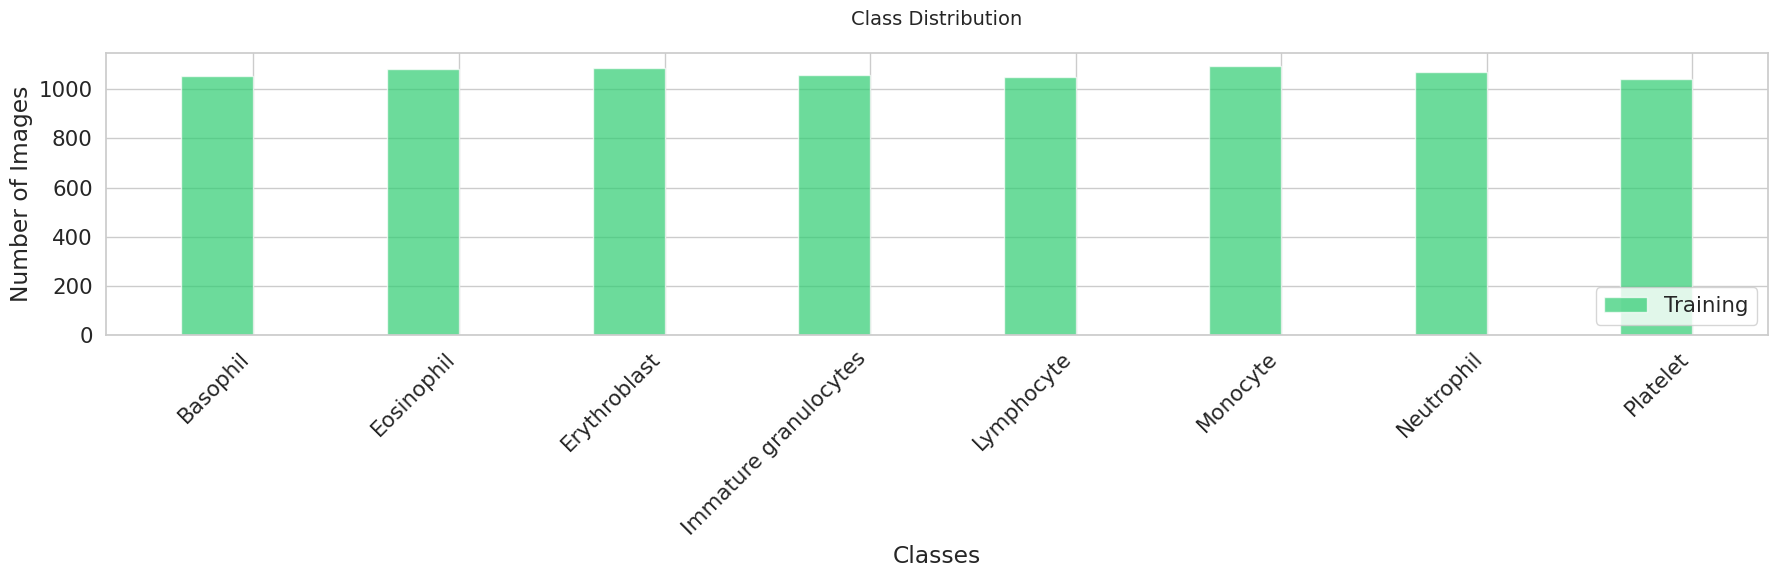

In [ ]:
# Set seaborn style for the plot
sns.set_style("whitegrid")
plt.figure(figsize=(18, 6))

# Calculate class distributions for dataset
dataset_dist = np.bincount(y[:,0])

# Create x positions and set bar width
x = np.arange(len(class_name))
width = 0.35

# Plot bars for training and test distributions
plt.bar(x - width / 2, dataset_dist, width, label='Training', color='#2ecc71', alpha=0.7)

# Customise plot title and labels
plt.title('Class Distribution', pad=20, fontsize=14)
plt.xlabel('Classes')
plt.ylabel('Number of Images')

# Set class names as x-axis labels with rotation
plt.xticks(x, list(class_name.values()), rotation=45, ha='right')

# Add legend for training and test distributions
plt.legend(loc='lower right')

# Adjust layout for optimal spacing
plt.tight_layout()
plt.show()

<hr>